# Lab | Clustering songs

In [ ]:
#%pip install -U scikit-learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# #read in files and add H or N 
# hot = pd.read_csv('/Users/deborahhaar/Desktop/ironhack-work/Week_6/Day_2/lab-spotify-api/data/hot_with_features.csv')
# hot['dataset'] = 'H'

# not_hot = pd.read_csv('/Users/deborahhaar/Desktop/ironhack-work/Week_6/Day_1/lab-not-hot-songs/not_hot_with_features.csv')
# not_hot['dataset'] = 'N'

# #concat files
# all_songs = pd.concat([hot, not_hot], axis = 0)

# #save csv
# all_songs.to_csv('all_songs.csv', index = False)

## Getting data

In [2]:
all_songs = pd.read_csv('all_songs.csv')

In [3]:
all_songs.head()

,id,titles,artists,danceability,energy,acousticness,instrumentalness,tempo,dataset
0,3k79jB4aGmMDUQzEwa46Rz,Vampire,Olivia Rodrigo,0.511,0.532,0.1690,0.000000,137.827,H
1,59uQI0PADDKeE6UZDTJEe8,Last Night,Morgan Wallen,0.517,0.675,0.4590,0.000000,203.853,H
2,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Luke Combs,0.712,0.603,0.1860,0.000000,97.994,H
3,0WtM2NBVQNNJLh6scP13H8,Calm Down,Rema & Selena Gomez,0.801,0.806,0.3820,0.000669,106.999,H
4,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0.0632,0.000005,117.999,H


In [4]:
features = all_songs[['danceability', 'energy', 'acousticness', 'instrumentalness', 'tempo']]

In [5]:
features.head()

,danceability,energy,acousticness,instrumentalness,tempo
0,0.511,0.532,0.1690,0.000000,137.827
1,0.517,0.675,0.4590,0.000000,203.853
2,0.712,0.603,0.1860,0.000000,97.994
3,0.801,0.806,0.3820,0.000669,106.999
4,0.707,0.681,0.0632,0.000005,117.999


## Scale features and then model

In [15]:
scaler = StandardScaler()
scaler.fit(features)
X_scaled_np = scaler.transform(features)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=features.columns)

model = DBSCAN(min_samples=10) # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
yhat = model.fit_predict(X_scaled_df)

In [16]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  0.05


In [17]:
features['cluster'] = yhat

/var/folders/4v/8q8s246j5t5_2qhs0c6ssd2m0000gn/T/ipykernel_89653/631904484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = yhat


In [18]:
clusters = np.unique(yhat)
clusters

array([-1,  0,  1,  2,  3,  4,  5])

## Fine Tuning

### Step 1

In [19]:
d = distance_matrix(X_scaled_df,X_scaled_df)
print(d)

[[0.         2.47368163 1.69037107 ... 1.79253096 2.00790071 1.49699361]
 [2.47368163 0.         3.76817333 ... 3.99463786 3.68341332 2.83436928]
 [1.69037107 3.76817333 0.         ... 0.97318125 1.31072531 2.35720364]
 ...
 [1.79253096 3.99463786 0.97318125 ... 0.         1.57884897 2.23102879]
 [2.00790071 3.68341332 1.31072531 ... 1.57884897 0.         3.10717464]
 [1.49699361 2.83436928 2.35720364 ... 2.23102879 3.10717464 0.        ]]


### Step 2

In [20]:
d2 = np.sort(d)[:,1:]
print(d2)

[[ 0.20177759  0.31841806  0.35068299 ...  9.3194575   9.34802647
   9.40674515]
 [ 0.69899208  0.74168947  0.86009269 ... 10.57177342 10.60142416
  10.72725788]
 [ 0.25705364  0.29542546  0.32029051 ...  9.41495275  9.4154106
   9.45343119]
 ...
 [ 0.22001974  0.23316568  0.26468121 ...  9.36334004  9.36953617
   9.39577148]
 [ 0.25969917  0.28288086  0.30471672 ...  9.45270206  9.48308801
   9.51636161]
 [ 0.27098492  0.34938491  0.37455353 ...  9.46518411  9.50145134
   9.51518023]]


### Step 3
We have 5 features so the number of points in the neighborhood is 10. 

Getting the 10th distance

In [21]:
f = d2[:,9]
print(f)

[0.47778772 1.1299643  0.4206018  ... 0.45871158 0.35853376 0.57682383]


### Step 4

In [22]:
f_final = np.sort(f)[::-1]
print(f_final)

[3.33990202 3.20865633 3.20261503 ... 0.23587446 0.23283112 0.23220208]


### Step 5
plotting and hoping for a clear elbow

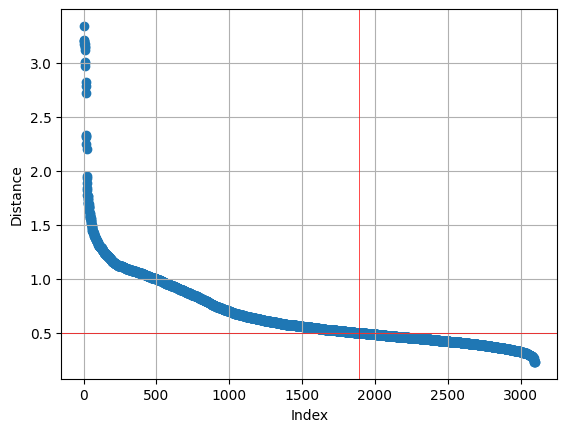

In [24]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid()
plt.show()

## Exploring Epislon values

In [25]:
#testing values between 1.0 and 1.5
np.arange(1.0,1.5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4])

In [26]:
models = {}

for value in np.arange(1.0,1.5,0.1):
    model = DBSCAN(eps=value, min_samples=10) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df)
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

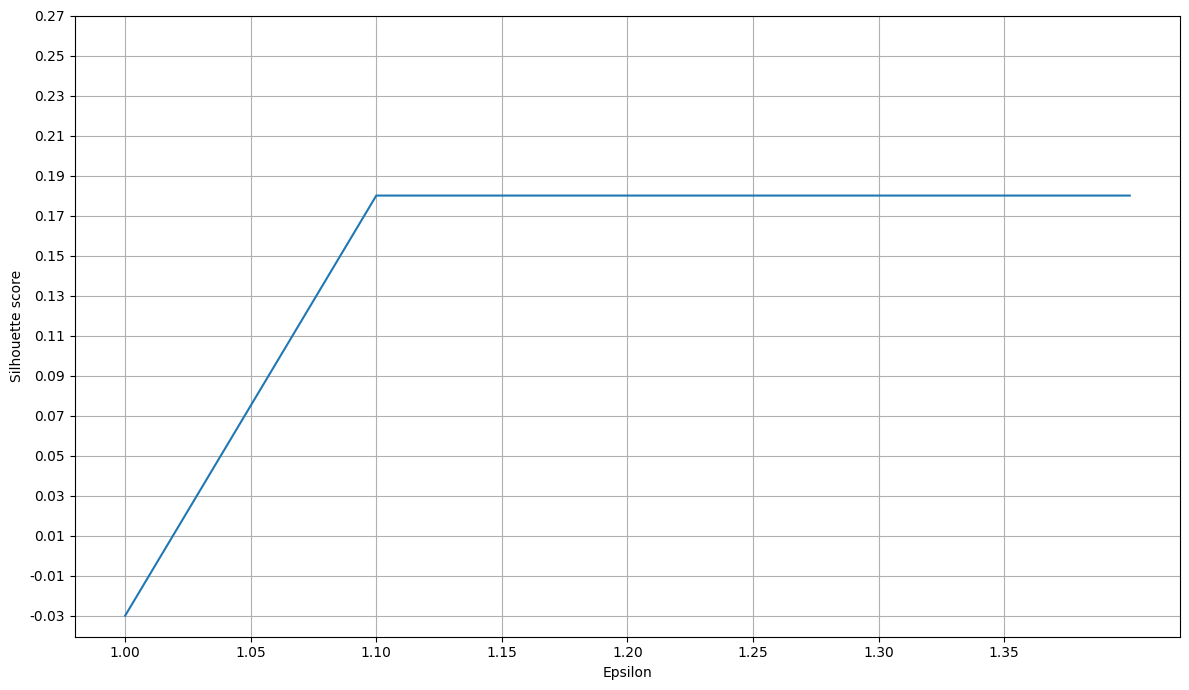

In [28]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(1.0,1.5,0.1)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.05))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

In [30]:
scaler = StandardScaler()
scaler.fit(features)
X_scaled_np = scaler.transform(features)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=features.columns)

model = DBSCAN(eps = 1.1, min_samples=10) # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
yhat = model.fit_predict(X_scaled_df)

In [31]:
clusters = np.unique(yhat)
clusters

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [32]:
features['DBSCAN_cluster'] = yhat

/var/folders/4v/8q8s246j5t5_2qhs0c6ssd2m0000gn/T/ipykernel_89653/631904484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = yhat


In [33]:
features

,danceability,energy,acousticness,instrumentalness,tempo,cluster
0,0.511,0.5320,0.169000,0.000000,137.827,0
1,0.517,0.6750,0.459000,0.000000,203.853,1
2,0.712,0.6030,0.186000,0.000000,97.994,0
3,0.801,0.8060,0.382000,0.000669,106.999,1
4,0.707,0.6810,0.063200,0.000005,117.999,0
...,...,...,...,...,...,...
3092,0.395,0.0533,0.975000,0.960000,115.798,3
3093,0.444,0.4170,0.826000,0.906000,96.696,3
3094,0.551,0.6570,0.251000,0.000000,85.255,0
3095,0.692,0.9440,0.000801,0.008070,108.002,0
